## Importing Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importing Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv',index_col='Date',parse_dates=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Preprocessing

### Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm     

### Missing Percent

<AxesSubplot:>

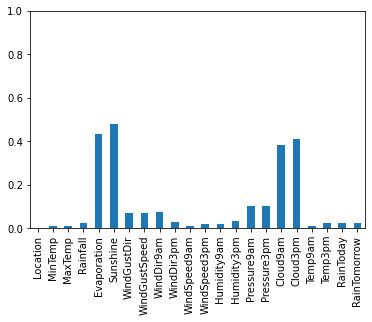

In [4]:
(df.isna().sum(axis=0)/df.shape[0]).plot(kind = 'bar',ylim = (0,1))

### Dropping Columns that have more than 20% missing values

In [5]:
missing_percent = df.isna().sum(axis=0)/df.shape[0]
drop_cols = missing_percent[missing_percent > 0.2].index

In [6]:
df.drop(columns=drop_cols,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Creating Date Columns

In [7]:
df['Date'] = pd.to_datetime(df.index)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,16.9,21.8,No,No,2008-12-01,2008,12,1
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,17.2,24.3,No,No,2008-12-02,2008,12,2
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,21.0,23.2,No,No,2008-12-03,2008,12,3
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,18.1,26.5,No,No,2008-12-04,2008,12,4
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,17.8,29.7,No,No,2008-12-05,2008,12,5


In [9]:
df.drop(columns = 'Date' , inplace=True)

### Check Missing Percent Again

<AxesSubplot:>

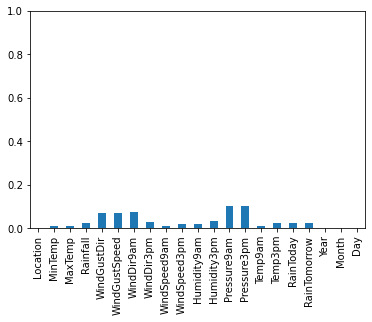

In [10]:
missing_percent = df.isna().sum(axis=0)/df.shape[0]
missing_percent.plot(kind='bar',ylim=(0,1))

In [11]:
df.dropna(axis=0,inplace=True)
df.shape

(112925, 21)

- all columns with missing values greater than 20% were dropped
- rest of the missing values will be imputed
- we still have a large dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112925 entries, 2008-12-01 to 2017-06-24
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow 

### Encode Categorical & Ordinal Columns

In [13]:
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

In [14]:
numeric_cols = list(df.select_dtypes(exclude='object'))
categorical_cols = ['Location']
ordinal_cols = list(set(df.columns) - set(numeric_cols) - set(categorical_cols))
numeric_cols.remove('RainTomorrow')

In [15]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Year',
 'Month',
 'Day']

In [16]:
ordinal_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [17]:
label_encoder = LabelEncoder()
for feature in categorical_cols+ordinal_cols:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

## Check Relationships

In [18]:
from scipy.stats import chi2_contingency
print("Relation with RainTomorrow at p = 0.05 ")
for feature in categorical_cols+ordinal_cols:
    data = pd.crosstab(df[feature],df['RainTomorrow'])
    stat, p , dof , expected = chi2_contingency(data)
    if p <= 0.05:
        print('{0} : Related ' .format(feature))
    else:
        print('{0} : Not Related' .format(feature))

Relation with RainTomorrow at p = 0.05 
Location : Related 
WindGustDir : Related 
WindDir9am : Related 
WindDir3pm : Related 


<AxesSubplot:>

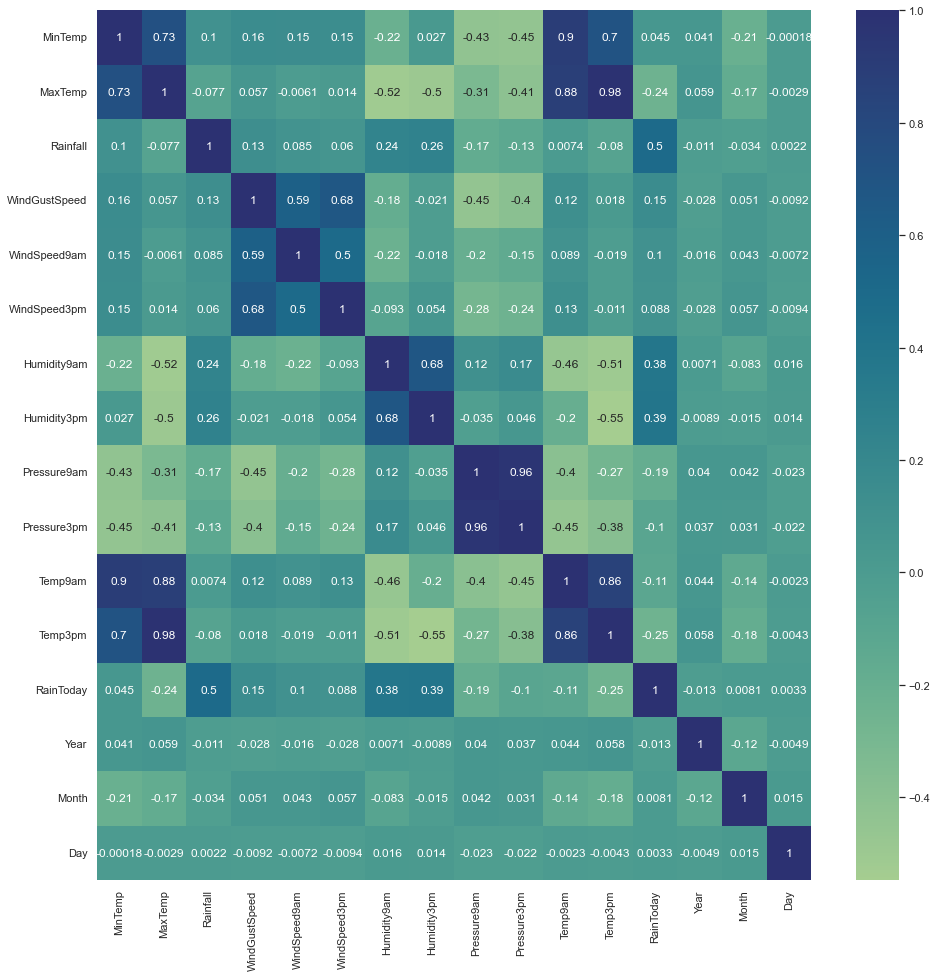

In [19]:
sns.set(rc = {'figure.figsize' : (16,16)})
sns.heatmap(df[numeric_cols].corr(), annot = True , cmap=sns.color_palette("crest", as_cmap=True)
)

## Variation Inflation Factor
- Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. 
- When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.
- Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features.

In [20]:
vif_data = pd.DataFrame()
ind_features = df[numeric_cols+ordinal_cols+categorical_cols]
vif_data['feature'] = ind_features.columns

In [21]:
vif_data['VIF'] = [variance_inflation_factor(ind_features.values, i)
                       for i in range(len(ind_features.columns))]

- High VIF indicates High Multicollinearity

In [22]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
8,Pressure9am,461302.282727
9,Pressure3pm,451261.448183
13,Year,36023.244445
11,Temp3pm,610.700298
1,MaxTemp,549.602462
10,Temp9am,190.345221
6,Humidity9am,57.474410
0,MinTemp,45.350388
7,Humidity3pm,45.105211
3,WindGustSpeed,28.244505


### Create Copy of Dataset for Future Comparision

In [23]:
df_without_vif = df.copy(deep = True)

### Remove Multicollinearity by Creating New Features
- we observe extremely high VIF 
- this can be fixed by creating new, more meaningful features to replace correlated features

In [24]:
df['Pressure_Interval'] = abs(df['Pressure9am'] - df['Pressure3pm'])
df['Humidity_Interval'] = abs(df['Humidity9am'] - df['Humidity3pm'])
df['TempInterval'] = abs(df['Temp9am'] - df['Temp3pm'])
df['WindSpeedInterval'] = abs(df['WindSpeed9am'] - df['WindSpeed3pm'])
df['Temperature_Interval'] = abs(df['MaxTemp'] - df['MinTemp'])

In [25]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,RainToday,RainTomorrow,Year,Month,Day,Pressure_Interval,Humidity_Interval,TempInterval,WindSpeedInterval,Temperature_Interval
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,0,0,2008,12,1,0.6,49.0,4.9,4.0,9.5
2008-12-02,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,0,0,2008,12,2,2.8,19.0,7.1,18.0,17.7
2008-12-03,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,0,0,2008,12,3,1.1,8.0,2.2,7.0,12.8
2008-12-04,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,0,0,2008,12,4,4.8,29.0,8.4,2.0,18.8
2008-12-05,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,0,0,2008,12,5,4.8,49.0,11.9,13.0,14.8


### Drop Old Correlated Features

In [26]:
df.drop(columns=['Pressure9am','Pressure3pm','MaxTemp','MinTemp','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm'],axis=1,inplace=True)

### Again, Check VIF after removing old Features

In [27]:
vif_data = pd.DataFrame()
ind_features = df.drop('RainTomorrow',axis=1)
vif_data['feature'] = ind_features.columns

In [28]:
vif_data["VIF"] = [variance_inflation_factor(ind_features.values, i)
                          for i in range(len(ind_features.columns))]

In [29]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
5,Year,31.427575
12,Temperature_Interval,19.266795
10,TempInterval,14.515086
3,WindGustSpeed,12.279484
9,Humidity_Interval,6.278897
8,Pressure_Interval,5.457814
6,Month,4.657495
2,WindGustDir,4.258867
7,Day,4.197751
0,Location,3.836466


### Success
- we have removed features with VERY high VIF
- now we will remove all with VIF > 5

In [30]:
df.drop(list(vif_data[vif_data['VIF']>5]['feature']),axis=1,inplace=True)

In [31]:
df.head()

,Location,Rainfall,WindGustDir,RainToday,RainTomorrow,Month,Day,WindSpeedInterval
Date,,,,,,,,
2008-12-01,1,0.6,13,0,0,12,1,4.0
2008-12-02,1,0.0,14,0,0,12,2,18.0
2008-12-03,1,0.0,15,0,0,12,3,7.0
2008-12-04,1,0.0,4,0,0,12,4,2.0
2008-12-05,1,1.0,13,0,0,12,5,13.0


In [32]:
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']
X.head()

,Location,Rainfall,WindGustDir,RainToday,Month,Day,WindSpeedInterval
Date,,,,,,,
2008-12-01,1,0.6,13,0,12,1,4.0
2008-12-02,1,0.0,14,0,12,2,18.0
2008-12-03,1,0.0,15,0,12,3,7.0
2008-12-04,1,0.0,4,0,12,4,2.0
2008-12-05,1,1.0,13,0,12,5,13.0


## Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Scale Values for Faster Computation

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training with Adjusted VIF

In [35]:
classifier_logreg = LogisticRegression(solver='sag', random_state=42)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='sag')

### Accuracy

In [36]:
print("Training Accuracy {:.2f} %".format(100*classifier_logreg.score(X_train,y_train)))

Training Accuracy 78.94 %


In [37]:
print("Testing Accuracy {:.2f} %".format(100*classifier_logreg.score(X_test,y_test)))

Testing Accuracy 78.83 %


### Model Training Without adjusted VIF

In [38]:
df_without_vif['WindDir9am'] = label_encoder.fit_transform(df_without_vif['WindDir9am'])
df_without_vif['WindDir3pm'] = label_encoder.fit_transform(df_without_vif['WindDir3pm'])

In [39]:
X_wo = df_without_vif.drop('RainTomorrow',axis=1)
y_wo = df_without_vif['RainTomorrow']

In [40]:
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo,y_wo, test_size = 0.2, random_state = 42)

In [41]:
scaler = StandardScaler()
X_train_wo = scaler.fit_transform(X_train_wo)
X_test_wo = scaler.transform(X_test_wo)

In [42]:
classifier_logreg_wo = LogisticRegression(solver='sag', random_state=0)
classifier_logreg_wo.fit(X_train_wo, y_train_wo)

LogisticRegression(random_state=0, solver='sag')

### Accuracy without VIF

In [43]:
print("Training Accuracy {:.2f}%".format(100*classifier_logreg_wo.score(X_train_wo,y_train_wo)))

Training Accuracy 84.95%


In [44]:
print("Testing Accuracy {:.2f}%".format(100*classifier_logreg_wo.score(X_test_wo,y_test_wo)))

Testing Accuracy 84.67%


## Conclusion

In [45]:
pd.DataFrame({'Without_Vif' : [classifier_logreg_wo.score(X_train_wo,y_train_wo),classifier_logreg_wo.score(X_test_wo,y_test_wo)],'With VIF':[classifier_logreg.score(X_train,y_train),classifier_logreg.score(X_test,y_test)]},index = ['Train Accuracy','Test Accuracy'])

,Without_Vif,With VIF
Train Accuracy,0.849535,0.789418
Test Accuracy,0.846668,0.788267


- This just shows how removing multicollinearity from model doesn't improve the predictive power of the model. 
- But, it improves model stability to changes in training data and there's an independent defined relation between dependent and explanatory variables.
- This fulfills the underlying assumption for Linear and Logistic Regression Models of absence of Multicollinearity